In [1]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset


d:\ThucHanhML_lab\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class TinyImageNetDataset(Dataset):
    def __init__(self, split, transform=None):
        ds = load_dataset("zh-plus/tiny-imagenet", split=split)
        self.images = ds["image"]
        self.labels = ds["label"]
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]

        if self.transform:
            img = self.transform(img)

        label = self.labels[idx]
        return img, label

class DataManager:
    """
    Manager for Tiny ImageNet (zh-plus/tiny-imagenet) via Hugging Face Datasets.
    """
    def __init__(self, batch_size, num_workers=2):
        self.batch_size = batch_size
        self.num_workers = num_workers

        self.transform_train = transforms.Compose([
            transforms.Lambda(lambda img: img.convert("RGB") if img.mode != "RGB" else img),
            transforms.RandomCrop(64, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])

        self.transform_valid = transforms.Compose([
            transforms.Lambda(lambda img: img.convert("RGB") if img.mode != "RGB" else img),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])

    def get_loaders(self):
        train_set = TinyImageNetDataset(split="train", transform=self.transform_train)
        valid_set = TinyImageNetDataset(split="valid", transform=self.transform_valid)

        train_loader = DataLoader(train_set, batch_size=self.batch_size,
                                  shuffle=True, num_workers=self.num_workers)
        valid_loader = DataLoader(valid_set, batch_size=self.batch_size,
                                  shuffle=False, num_workers=self.num_workers)

        return train_loader, valid_loader

In [3]:
data_manager = DataManager(2, 2)
trainloader, testloader = data_manager.get_loaders()

In [6]:
from tqdm import tqdm

In [ ]:
for i in tqdm(testloader):
    print(i)
    break

  0%|          | 0/5000 [00:00<?, ?it/s]

In [11]:
ds = load_dataset("zh-plus/tiny-imagenet")
train_ds, valid_ds = ds["train"], ds["valid"]

In [15]:
len(train_ds['image'])

100000

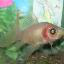

In [ ]:
train_ds['image'][0]

In [29]:
train_ds['label']

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [20]:
transform_train = transforms.Compose([
            transforms.Lambda(lambda img: img.convert("RGB") if img.mode != "RGB" else img),
            transforms.RandomCrop(64, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])

In [21]:
a = transform_train(train_ds['image'][0])

tensor([[[-2.1179, -2.1179,  2.2489,  ...,  1.5810,  1.6324,  1.4269],
         [-2.1179, -2.1179,  2.2489,  ...,  1.5297,  1.7009,  1.5468],
         [-2.1179, -2.1179,  2.2489,  ...,  1.7180,  1.8208,  1.5810],
         ...,
         [-2.1179, -2.1179, -0.5596,  ..., -0.9363, -0.6281, -0.4739],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357,  0.1352,  ...,  2.0084,  2.1485,  2.0434],
         [-2.0357, -2.0357,  0.0826,  ...,  1.9034,  2.2010,  2.1835],
         [-2.0357, -2.0357,  0.0476,  ...,  2.0784,  2.2885,  2.2010],
         ...,
         [-2.0357, -2.0357,  0.0651,  ..., -0.9678, -0.7052, -0.5476],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044,  1.6988,  ...,  2.1694,  2.3263,  2.2043],
         [-1.8044, -1.8044,  1.8034,  ...,  2